In [12]:
using ElasticityAD, Statistics, LinearAlgebra

## Strain stiffening of a cytoskeletal network

In [14]:
cyto_net = load_network("../data/threshold0x001_conc0.5_maxrl3_epsilon0x05_17500.jld2")
cyto_net.points

3×1359 Matrix{Float64}:
 0.442969  0.906131  0.756105  0.932601  …  0.115395  0.384392  0.56442
 0.119794  0.124813  0.887844  0.262796     0.301546  0.555719  0.675178
 0.720869  0.497534  0.332571  0.842789     0.229909  0.150017  0.163738

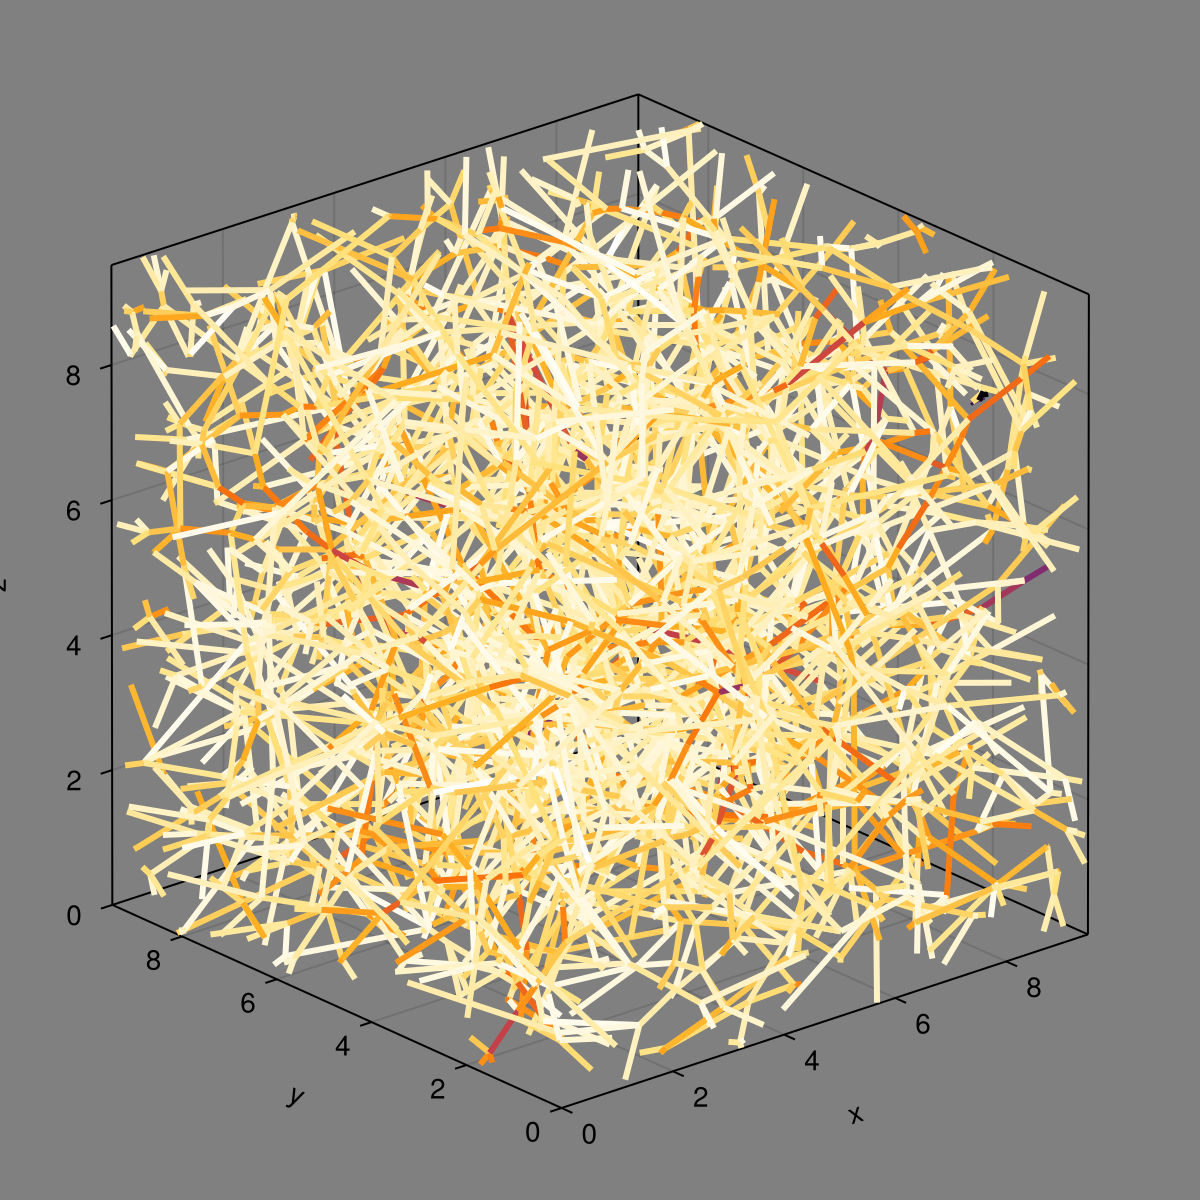

In [15]:
visualize_net(cyto_net)

In [4]:
mean(ElasticityAD.tensions(cyto_net))

0.008133850101248388

In [5]:
moduli(cyto_net) #this takEs about 40 seconds

B = 0.28269569429851776 
 G = 0.026874514393417252 
 c1111 = 0.3526109201439431 
 c2222 = 0.317510384533873 
 c3333 = 0.2866431813566683 
 c1212 = 0.026659515851404265 
 c1313 = 0.028182678839586056 
 c2323 = 0.025191675706630532 
 c1122 = 0.278453915746671 
 c1133 = 0.2666222905934444 
 c2233 = 0.24867217498597272


(0.28269569429851776, 0.026874514393417252, 0.3526109201439431, 0.317510384533873, 0.2866431813566683, 0.026659515851404265, 0.028182678839586056, 0.025191675706630532, 0.278453915746671, 0.2666222905934444, 0.24867217498597272)

In [6]:
cyto_net_dilated = deepcopy(cyto_net)
cyto_net_dilated.basis[1, 1] *= 1.1 #apply 10% uniaxial strain

10.424263041710232

In [7]:
moduli(cyto_net_dilated)

B = 0.31369520957503727 
 G = 0.0829789160239432 
 c1111 = 0.63956119212454 
 c2222 = 0.336775438515104 
 c3333 = 0.31619903024201723 
 c1212 = 0.08553138563994878 
 c1313 = 0.0901364267278055 
 c2323 = 0.06350175167368691 
 c1122 = 0.28770479874254673 
 c1133 = 0.2827429524425115 
 c2233 = 0.19491286146177889


(0.31369520957503727, 0.0829789160239432, 0.63956119212454, 0.336775438515104, 0.31619903024201723, 0.08553138563994878, 0.0901364267278055, 0.06350175167368691, 0.28770479874254673, 0.2827429524425115, 0.19491286146177889)

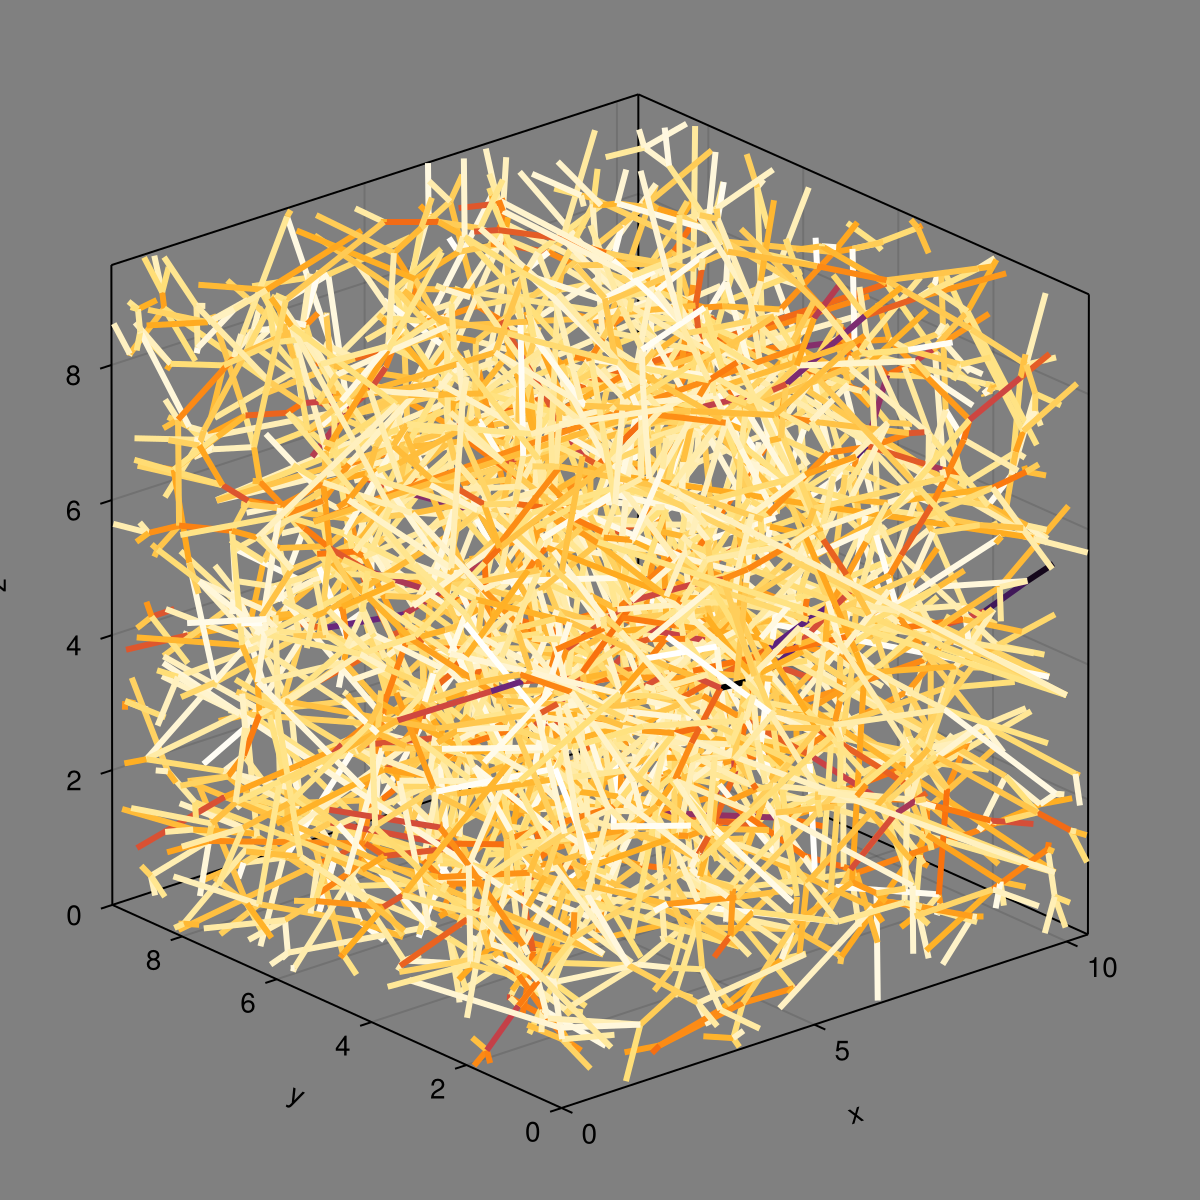

In [10]:
visualize_net(cyto_net_dilated)

Note that $G$ has increased 3-fold with just a 10% uniaxial strain!

In [8]:
cyto_net_sheared = deepcopy(cyto_net)
cyto_net_sheared.basis *= ([0 0.1 0; 0.1 0 0; 0 0 0] + I)
moduli(cyto_net_sheared) #takes 90 seconds because relaxation takes time.

B = 0.2609951004182405 
 G = 0.05430485674194841 
 c1111 = 0.36099807823842367 
 c2222 = 0.33547040495003105 
 c3333 = 0.26944384854701575 
 c1212 = 0.09030958382193531 
 c1313 = 0.046544244348847685 
 c2323 = 0.043206940298584504 
 c1122 = 0.25713204426569114 
 c1133 = 0.22220545000523922 
 c2233 = 0.21218429174341658


(0.2609951004182405, 0.05430485674194841, 0.36099807823842367, 0.33547040495003105, 0.26944384854701575, 0.09030958382193531, 0.046544244348847685, 0.043206940298584504, 0.25713204426569114, 0.22220545000523922, 0.21218429174341658)

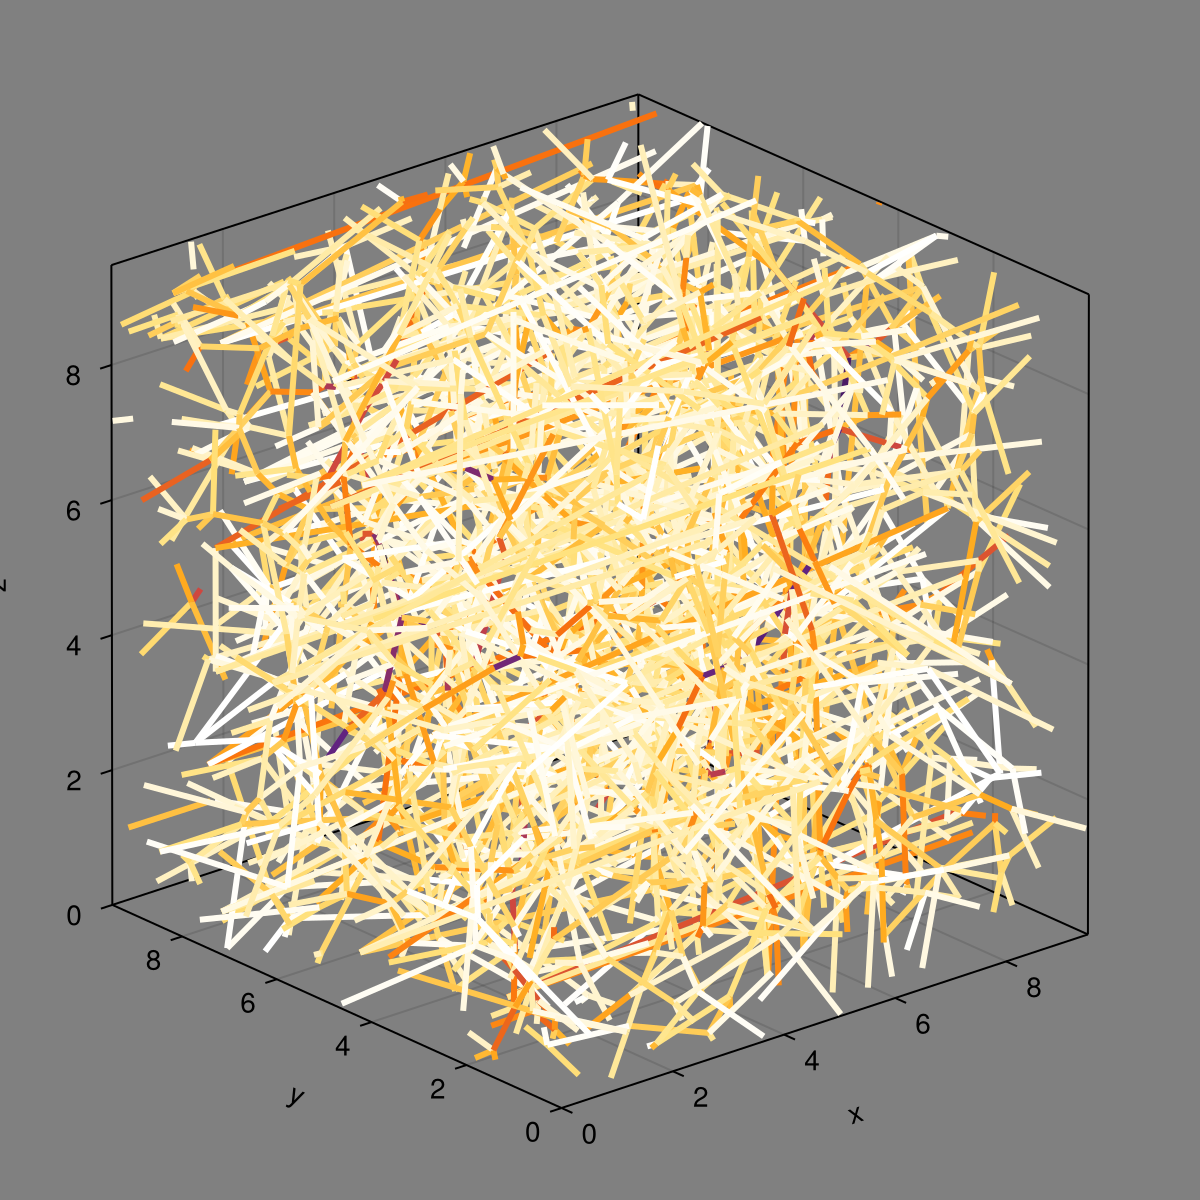

In [9]:
visualize_net(cyto_net_sheared)

## What about a cubic network that does not have tensional rigidity?

In [11]:
println("cubic network:")
cube_net = cubic_network(10, 10)
moduli(cube_net)
println("dilated cubic:")
cube_net_dilated = deepcopy(cube_net)
cube_net_dilated.basis[1, 1] *= 1.1
moduli(cube_net_dilated)
println("sheared cubic:")
cube_net_sheared = deepcopy(cube_net)
cube_net_sheared.basis *= ([0 0.1 0; 0.1 0 0; 0 0 0] + I)
moduli(cube_net_sheared)

B = 0.3333333333333333 
 G = 0.2 
 c1111 = 1.0 
 c2222 = 1.0 
 c3333 = 1.0 
 c1212 = 0.0 
 c1313 = 0.0 
 c2323 = 0.0 
 c1122 = 0.0 
 c1133 = 0.0 
 c2233 = 0.0
B = 0.3242424242424274 
 G = 0.2045454545454551 
 c1111 = 1.1000000000000156 
 c2222 = 0.9090909090909091 
 c3333 = 0.9090909090909091 
 c1212 = 0.024999999999999866 
 c1313 = 0.024999999999999866 
 c2323 = 2.5232341468787135e-18 
 c1122 = 3.1086244689504383e-15 
 c1133 = 3.1086244689504383e-15 
 c2233 = 0.0
B = 0.3389190724377206 
 G = 0.20438797050542543 
 c1111 = 1.0002992866236362 
 c2222 = 1.0002997923896 
 c3333 = 1.0100975230594151 
 c1212 = 0.022434269203587907 
 c1313 = 0.0012680892426012278 
 c2323 = 0.0012678017011930481 
 c1122 = 0.01990400594949482 
 c1133 = 5.252659950549798e-6 
 c2233 = -0.00012173367602819063


(0.3389190724377206, 0.20438797050542543, 1.0002992866236362, 1.0002997923896, 1.0100975230594151, 0.022434269203587907, 0.0012680892426012278, 0.0012678017011930481, 0.01990400594949482, 5.252659950549798e-6, -0.00012173367602819063)

## What about a diamond network with the same prestrain?

In [12]:
println("diamond:")
diamond_net = diamond1000(9.4766, 0.0081)
moduli(diamond_net)
println("dilated diamond:")
diamond_net_dilated = deepcopy(diamond_net)
diamond_net_dilated.basis[1, 1] *= 1.1
moduli(diamond_net_dilated)
println("sheared diamond:")
diamond_net_sheared = deepcopy(diamond_net)
diamond_net_sheared.basis *= ([0 0.1 0; 0.1 0 0; 0 0 0] + I)
moduli(cube_net_sheared)

diamond:
B = 0.21603127713459339 
 G = 0.005653995850661213 
 c1111 = 0.21950286397080312 
 c2222 = 0.21950286397080312 
 c3333 = 0.2195028639708031 
 c1212 = 0.007687532999663846 
 c1313 = 0.007687532999663829 
 c2323 = 0.0076875329996638365 
 c1122 = 0.21429548371648857 
 c1133 = 0.2142954837164885 
 c2233 = 0.2142954837164886
dilated diamond:
B = 0.2101395150309115 
 G = 0.0273269051784048 
 c1111 = 0.2869518315515147 
 c2222 = 0.20018755069197094 
 c3333 = 0.20018755069197094 
 c1212 = 0.039075331012213554 
 c1313 = 0.0390753310122135 
 c2323 = 0.03002966994623593 
 c1122 = 0.2129756914963029 
 c1133 = 0.2129756914963029 
 c2233 = 0.1760129681787677
sheared diamond:
B = 0.3389190724377206 
 G = 0.20438797050542543 
 c1111 = 1.0002992866236362 
 c2222 = 1.0002997923896 
 c3333 = 1.0100975230594151 
 c1212 = 0.022434269203587907 
 c1313 = 0.0012680892426012278 
 c2323 = 0.0012678017011930481 
 c1122 = 0.01990400594949482 
 c1133 = 5.252659950549798e-6 
 c2233 = -0.0001217336760281906

(0.3389190724377206, 0.20438797050542543, 1.0002992866236362, 1.0002997923896, 1.0100975230594151, 0.022434269203587907, 0.0012680892426012278, 0.0012678017011930481, 0.01990400594949482, 5.252659950549798e-6, -0.00012173367602819063)

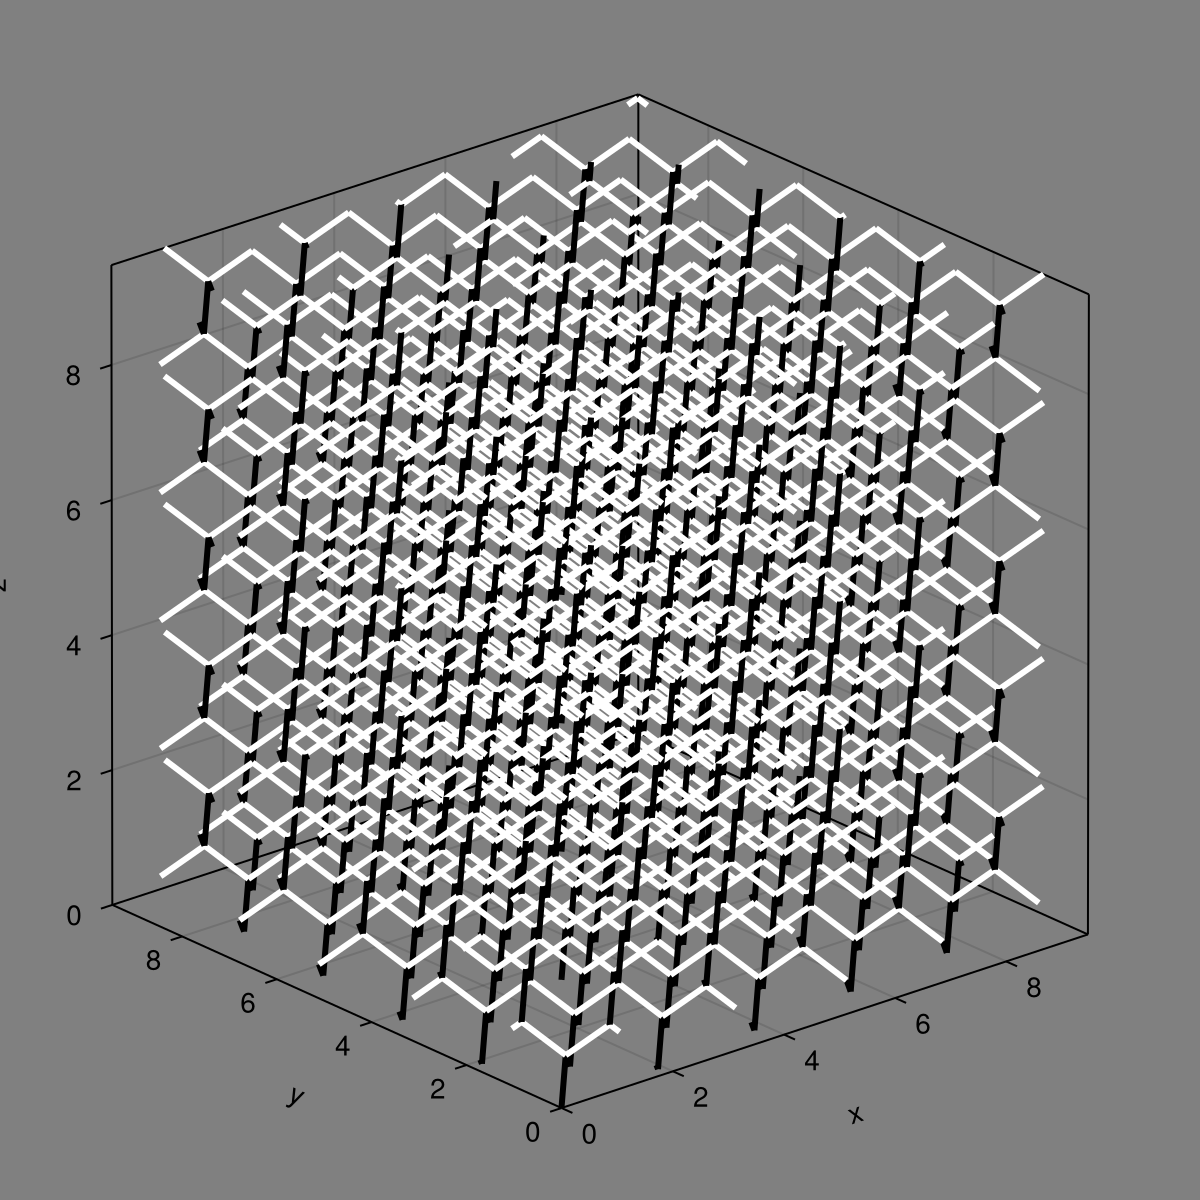

In [13]:
visualize_net(diamond_net_sheared)

## What about a Erdos-Renyi network with random node positions?

In [1]:
ern = er(9.4766, rand(3, 1359), 4.0, 0.2)

UndefVarError: UndefVarError: `er` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [2]:
relax!(ern, show_trace = true)

UndefVarError: UndefVarError: `relax!` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [3]:
for e in eachindex(ern.rest_lengths)
    ern.rest_lengths[e] *= 1.05
end
relax!(ern, show_trace = true)

UndefVarError: UndefVarError: `ern` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [4]:
mean(ElasticityAD.tensions(ern))

UndefVarError: UndefVarError: `mean` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [5]:
erncopy = deepcopy(ern)
simplify_net!(erncopy)

UndefVarError: UndefVarError: `ern` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [6]:
moduli(erncopy)

UndefVarError: UndefVarError: `moduli` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [7]:
visualize_net(erncopy)

UndefVarError: UndefVarError: `visualize_net` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [8]:
erncopy.g

UndefVarError: UndefVarError: `erncopy` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [9]:
erncopy.basis[1, 1] *= 1.1

UndefVarError: UndefVarError: `erncopy` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [10]:
moduli(erncopy)

UndefVarError: UndefVarError: `moduli` not defined in `Main`
Suggestion: check for spelling errors or missing imports.